In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [48]:
data = pd.read_csv('world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [49]:
for col in data:
    if col == 'Standard error of ladder score' or col == 'Standard error of ladder score' or 'whisker' in col or 'Explained by' in col or 'Dystopia' in col:
        del data[col]
data.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


# Рейтинг стран, граждане которых считают себя счастливыми

In [98]:
def create_happiness(region):
    ''' Функция, редактирует датасет для удобного построения графика
    
    region: Название региона из датасета(чувствительно к регистру)
    '''
    region = data[data['Regional indicator'] == region]
    region = region[['Country name', 'Ladder score']]
    region.set_index('Country name', inplace=True)
    return region

In [114]:
def happiness(data, name):
    ''' Функция, для построения графика и сохранения его в файл
    
    data: датасет
    name: название региона (для сохранения в файл)
    '''
    data.plot(kind='bar', figsize=(20, 10))
    plt.savefig(f'{name}.png')
    plt.xlabel('Country') 
    plt.ylabel('Score of happiness') 
    plt.title(f'{name} happiness')
    plt.show()


,Country name,Ladder score
137,Sierra Leone,3.849
138,India,3.819
139,Burundi,3.775
140,Yemen,3.658
141,Tanzania,3.623


In [99]:
data['Regional indicator'].value_counts() # Регионы, которые присутствуют в датасете

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

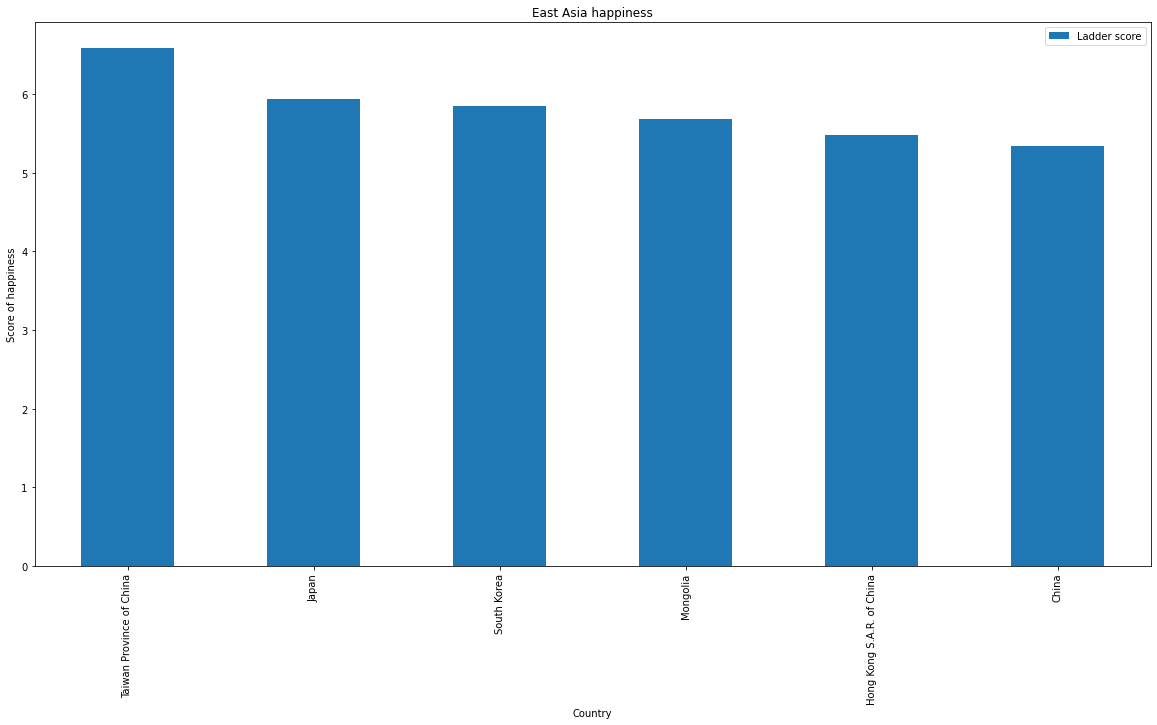

In [125]:
east_asia = create_happiness('East Asia')
happiness(east_asia, 'East Asia')

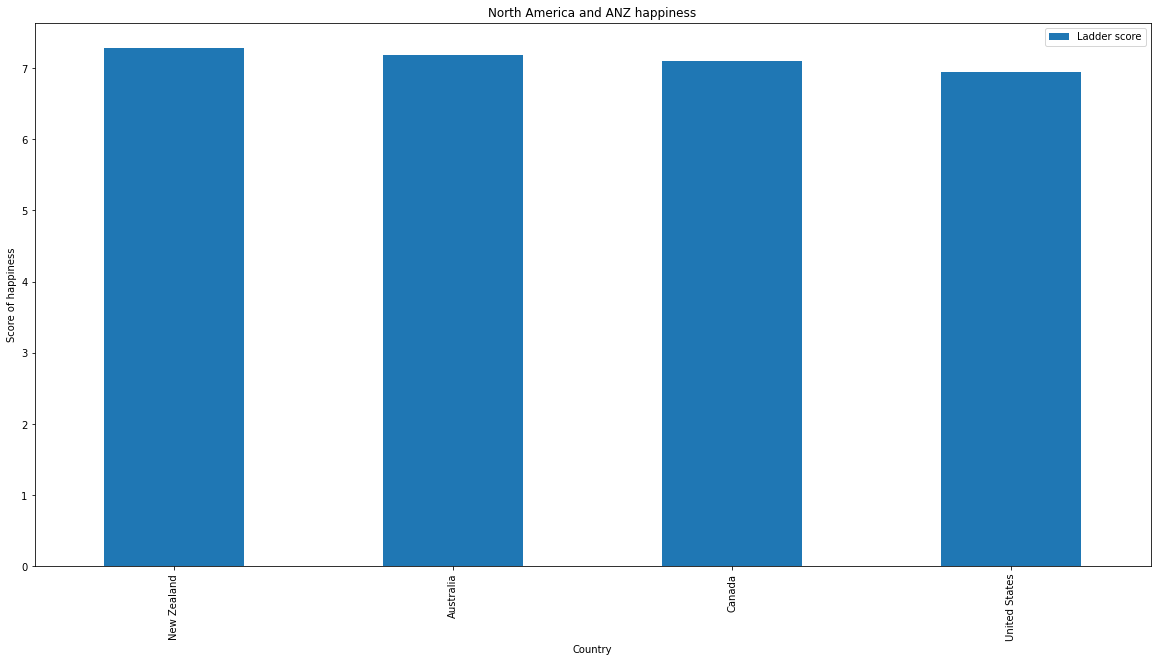

In [126]:
north_america = create_happiness('North America and ANZ')
happiness(north_america, 'North America and ANZ')

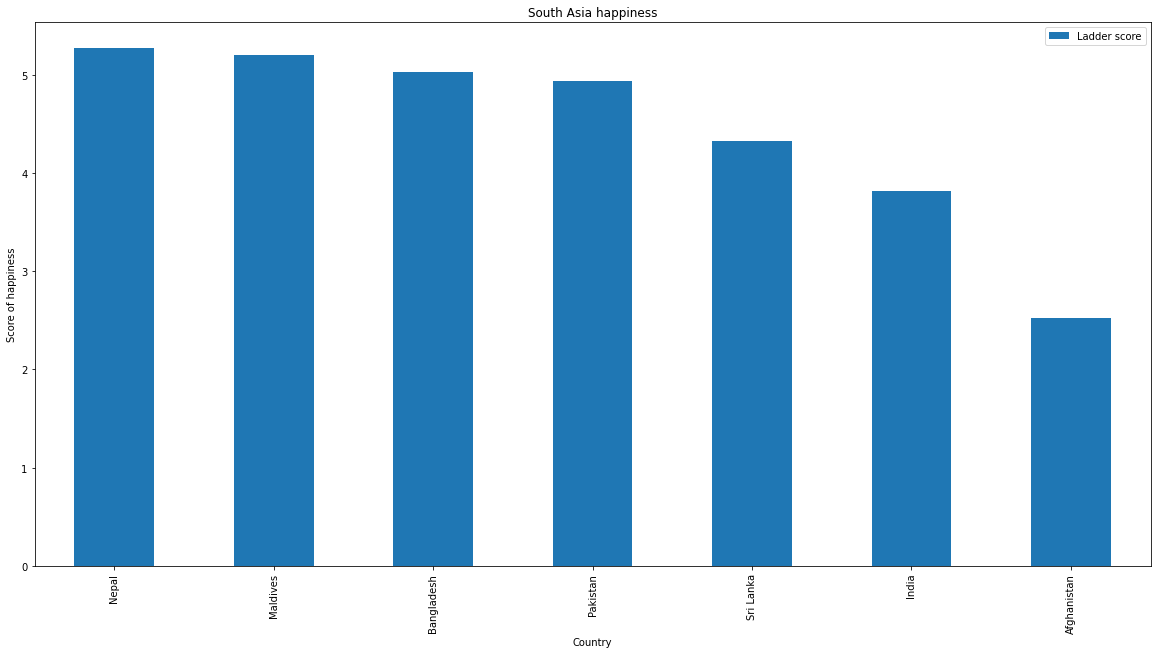

In [124]:
south_asia = create_happiness('South Asia')
happiness(south_asia, 'South Asia')

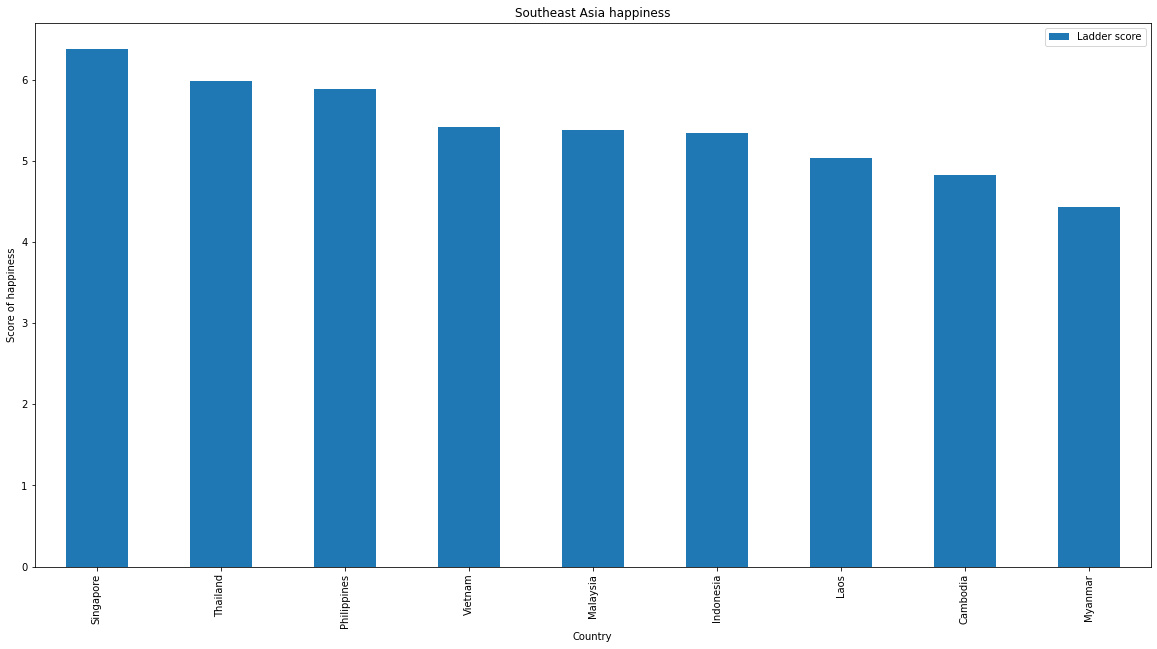

In [123]:
southeast_asia = create_happiness('Southeast Asia')
happiness(southeast_asia, 'Southeast Asia')


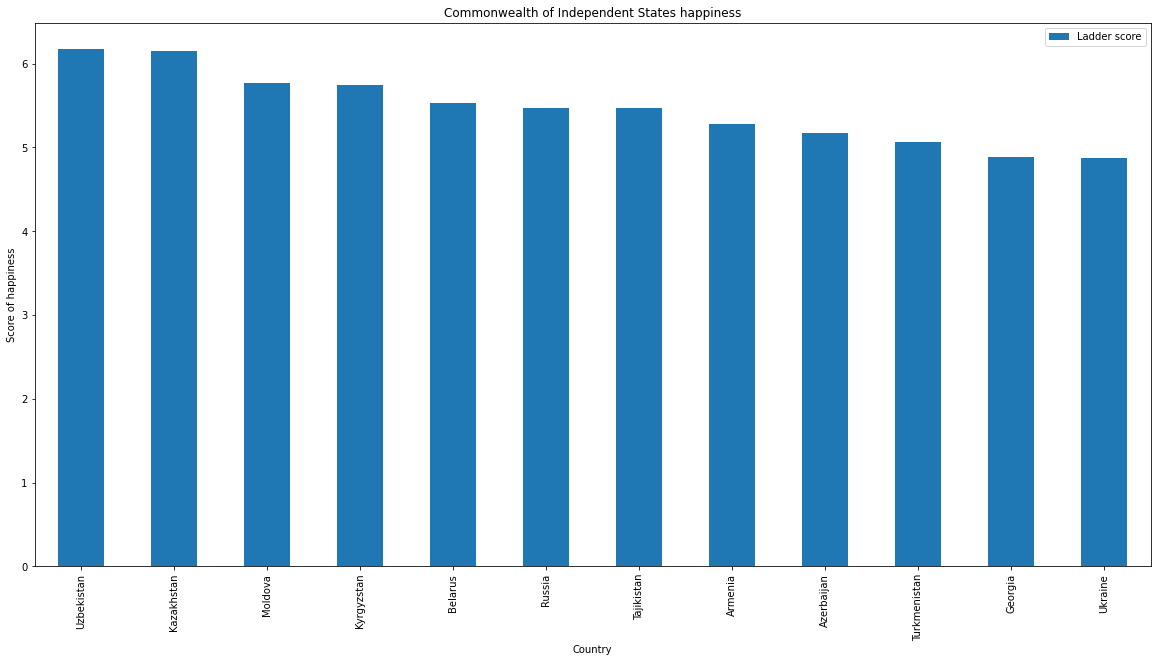

In [122]:
states = create_happiness('Commonwealth of Independent States')
happiness(states, 'Commonwealth of Independent States')

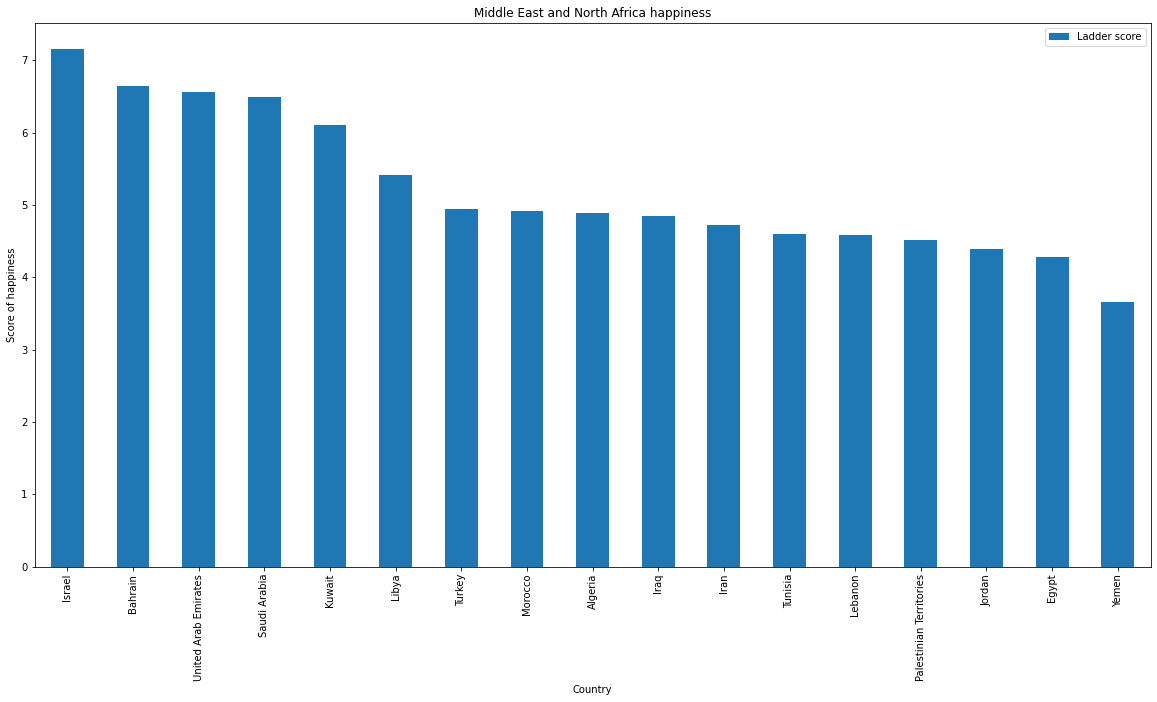

In [121]:
east_north_africa = create_happiness('Middle East and North Africa')
happiness(east_north_africa, 'Middle East and North Africa')

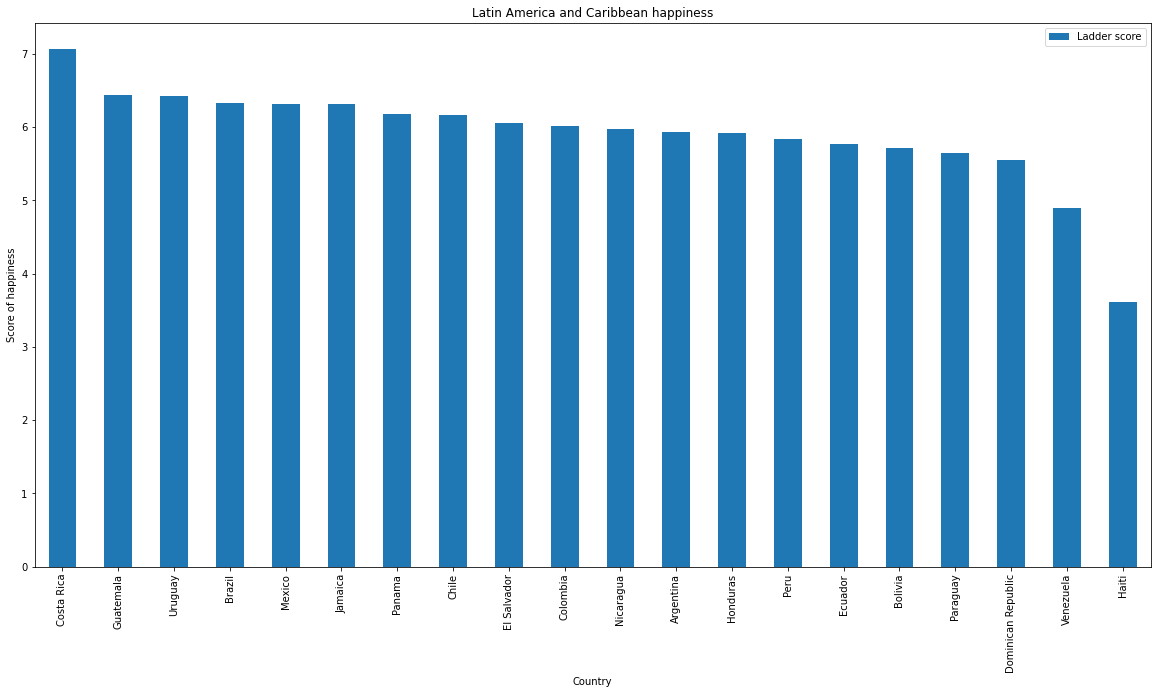

In [119]:
latin_america = create_happiness('Latin America and Caribbean')
happiness(latin_america, 'Latin America and Caribbean')


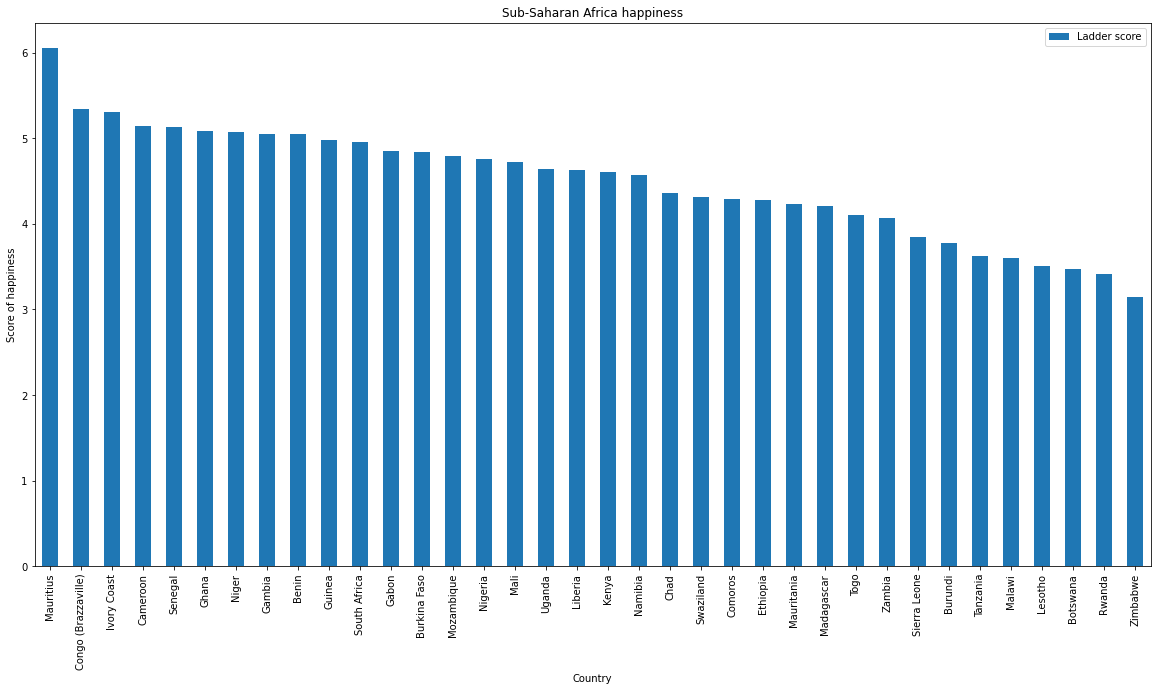

In [120]:
saharan_africa = create_happiness('Sub-Saharan Africa')
happiness(saharan_africa, 'Sub-Saharan Africa')

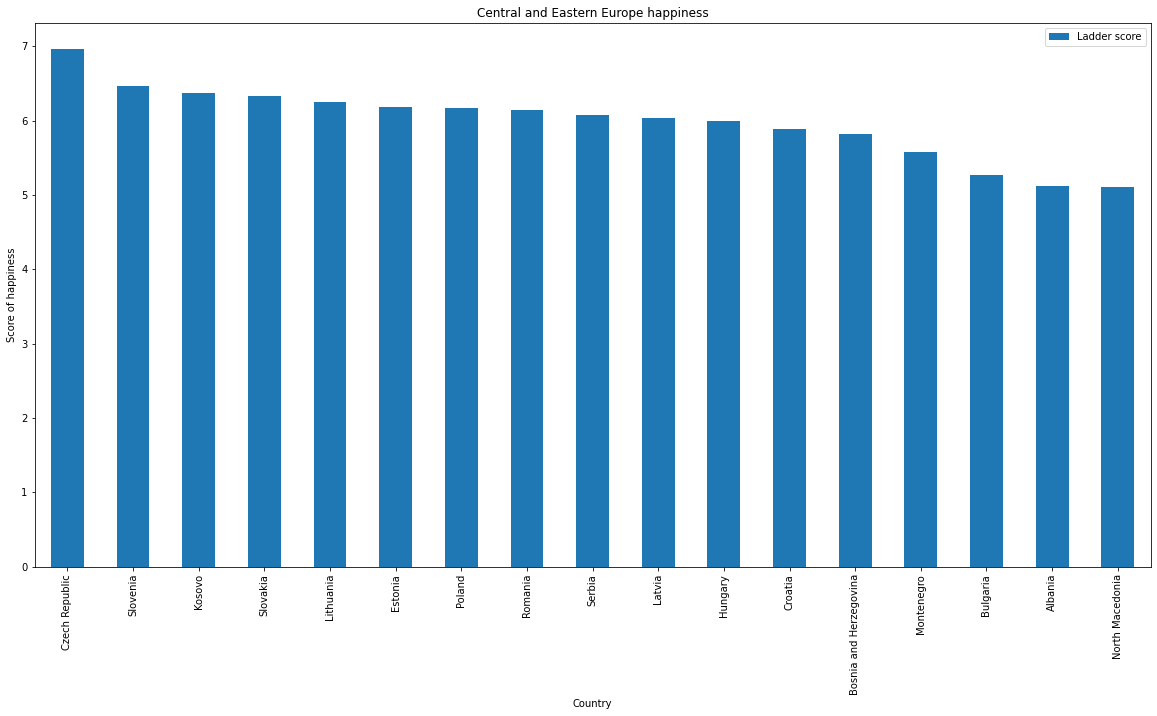

In [115]:
central_eastern_europe_happiness = create_happiness('Central and Eastern Europe')
happiness(central_eastern_europe_happiness, 'Central and Eastern Europe')

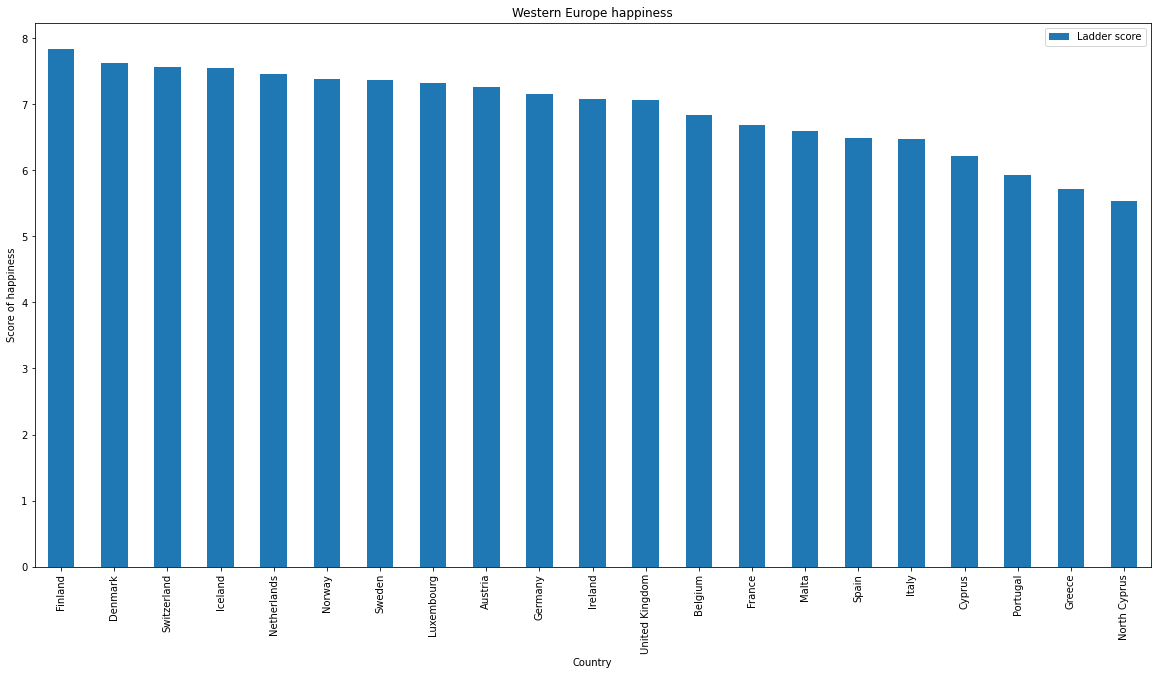

In [116]:
western_europe_happiness = create_happiness('Western Europe')
happiness(western_europe_happiness, 'Western Europe')

# Топ счастливых стран


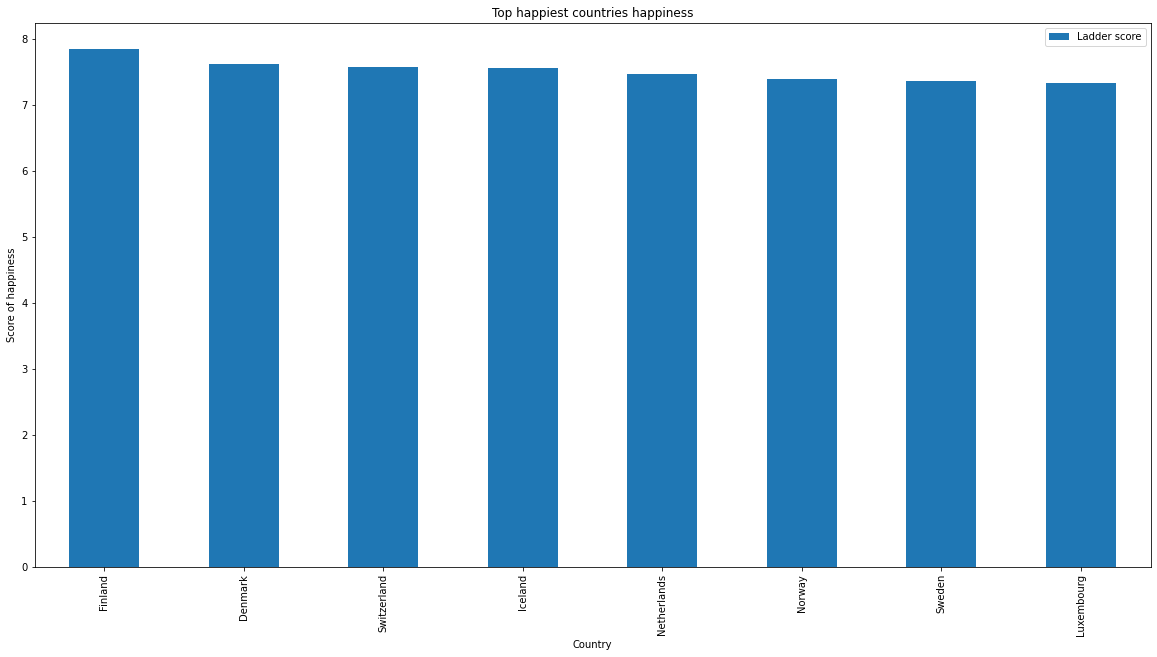

In [135]:
top_happiest_countries = data[data['Ladder score'] > 7.3]
top_happiest_countries = top_happiest_countries[['Country name', 'Ladder score']]
top_happiest_countries.set_index('Country name', inplace=True)
happiness(top_happiest_countries, 'Top happiest countries')

# Топ несчатсных стран

In [175]:
top_unhappiest_countries = data[data['Ladder score'] < 4]
top_unhappiest_countries = top_unhappiest_countries[['Country name', 'Ladder score']]
top_unhappiest_countries.set_index('Country name', inplace=True)
top_unhappiest_countries.head()



,Ladder score
Country name,
Sierra Leone,3.849
India,3.819
Burundi,3.775
Yemen,3.658
Tanzania,3.623


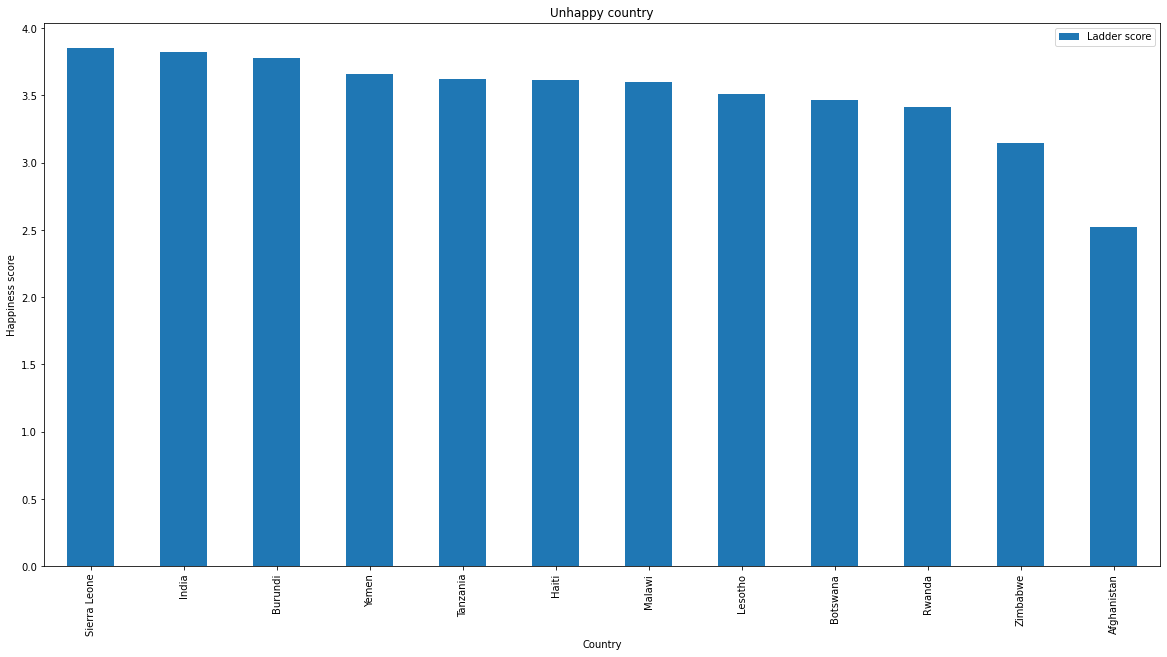

In [176]:
top_unhappiest_countries.plot(kind='bar', figsize=(20, 10))
plt.savefig('top_unhappiest_countries.png')
plt.xlabel('Country') 
plt.ylabel('Happiness score') 
plt.title('Unhappy country')
plt.show()

# Где меньше всех коррупции

In [161]:
smallest_corruption = data[data['Perceptions of corruption'] < 0.3]
smallest_corruption = smallest_corruption[['Country name', 'Perceptions of corruption']]
smallest_corruption.set_index('Country name', inplace=True)
smallest_corruption.head()

,Perceptions of corruption
Country name,
Finland,0.186
Denmark,0.179
Switzerland,0.292
Norway,0.270
Sweden,0.237


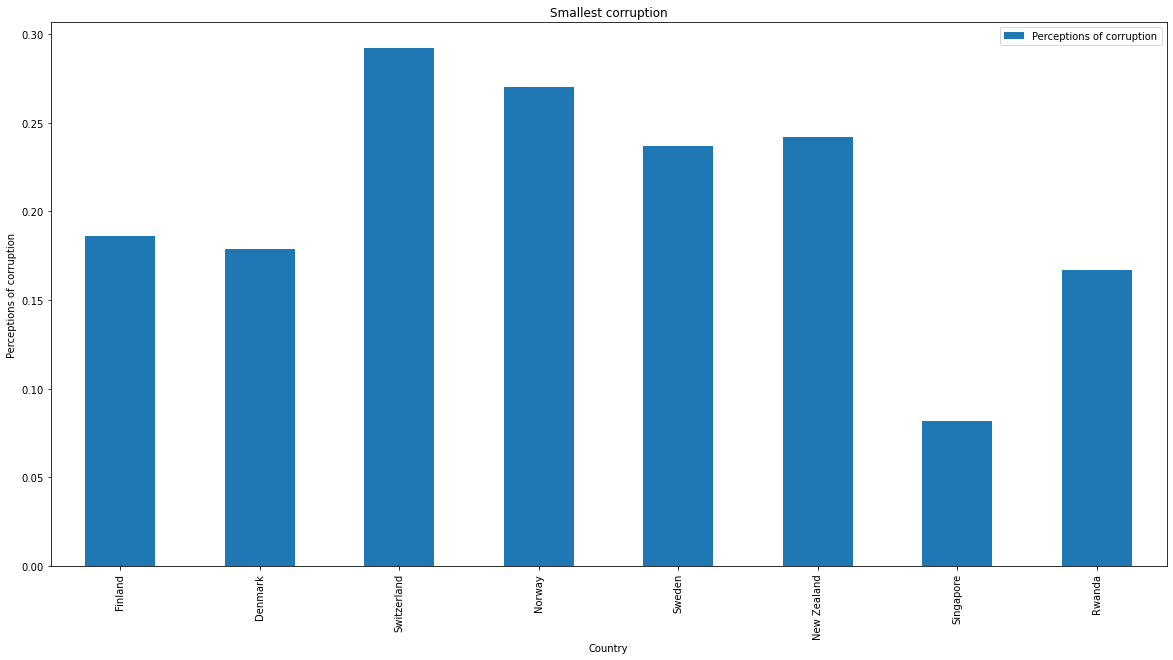

In [162]:
smallest_corruption.plot(kind='bar', figsize=(20, 10))
plt.savefig('smallest_corruption.png')
plt.xlabel('Country') 
plt.ylabel('Perceptions of corruption') 
plt.title('Smallest corruption')
plt.show()

# Где больше всего коррупции

In [181]:
largest_corruption = data[data['Perceptions of corruption'] > 0.91]
largest_corruption = largest_corruption[['Country name', 'Perceptions of corruption']]
largest_corruption.set_index('Country name', inplace=True)
largest_corruption

,Perceptions of corruption
Country name,
Kosovo,0.917
Slovakia,0.911
Romania,0.938
Croatia,0.939
Bosnia and Herzegovina,0.931
Moldova,0.918
Bulgaria,0.932
Ukraine,0.924
Lesotho,0.915


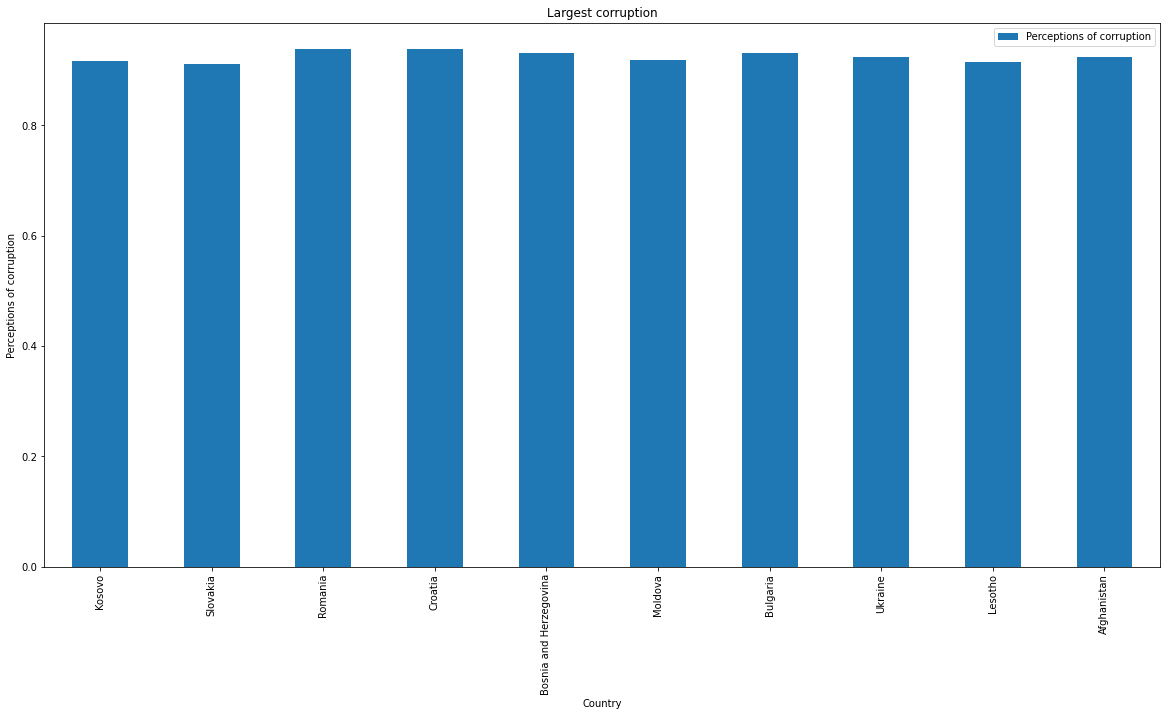

In [182]:
largest_corruption.plot(kind='bar', figsize=(20, 10))
plt.savefig('largest_corruption.png')
plt.xlabel('Country') 
plt.ylabel('Perceptions of corruption') 
plt.title('Largest corruption')
plt.show()